# Get and explore dataset

In [171]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import re
import pandas as pd
import keras
import tensorflow as tf

# importing the layers needed from keras
from keras.layers import BatchNormalization
from keras.layers import SpatialDropout1D
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import LSTM, Dense, Dropout
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

import keras
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.utils import to_categorical

In [172]:
# Make results reproducible - set random seed
from numpy.random import seed
seed(42)

In [173]:
negative_file = "negative.txt"
positive_file = "positive.txt"

In [174]:
# Do not modify - helper function to load and preprocess data
def filter_words(line):    
    line = re.sub(r'[^\w\s]','',line.rstrip())
    words = line.split(" ") 
    words = [i.lower() for i in words if i]      
    return " ".join(words)

def load_data(filename):
    thefile = open(filename, 'r') 
    lines = thefile.readlines() 

    data = []
    for l in range(0,len(lines)): 
        if(lines[l-1].strip() == "<title>"): 
            theline = filter_words(lines[l])
            if(len(theline) < 50):
                data.append(theline)            
            
    return data

# Helper function to convert categorical data to class label
def to_word_label(y):
    y = to_class(y)   
    return ["positive" if i==0 else "negative" for i in y]

# Helper function to convert class label to numeric label
def to_numeric_label(y):
    return [0 if i=="positive" else 1 for i in word_labels]

# Helper function: this function needs to be called before sending arrays to sklearn metrics,
# it converts back to class form from categorical form. ie: [1,0] --> 0, [0,1] --> 1
def to_class(y):
    return np.argmax(y,axis=1) 

In [175]:
positive = load_data(positive_file)
negative = load_data(negative_file)

print(positive[0:10])
print(negative[0:10])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book', 'to the point and beautifully illustrated', 'at least somebody has got it', 'beautifully written heartwarming story', 'an excellent cookbook full of delicious recipes', 'an outstanding resource']
['horrible book horrible', 'shallow selfindulgence', 'horrible book horrible', 'disappointment', 'a disappointing mess', 'save your money there are better books out there', 'thank you but no thanks', 'unendurable', 'the hard way', 'some good info among the political commercial']


In [176]:
# Do not modify - Combines the positive and negative reviews into a single list and create labels
data = positive + negative
word_labels = ["positive"] * len(positive) + ["negative"] * len(negative) 

# Converts labels to numbers in one-hot encoding - [1, 0] (positive) or [0, 1] (negative)
from tensorflow.keras.utils import to_categorical
labels  = to_categorical(to_numeric_label(word_labels))

def filter_words(line):    
    line = re.sub(r'[^\w\s]','',line.rstrip())
    words = line.split(" ") 
    words = [i.lower() for i in words if i]      
    return " ".join(words)

def load_data(filename):
    thefile = open(filename, 'r') 
    lines = thefile.readlines() 

    data = []
    for l in range(0,len(lines)): 
        if(lines[l-1].strip() == "<title>"): 
            theline = filter_words(lines[l])
            if(len(theline) < 50):
                data.append(theline)            
            
    return data

# Helper function to convert categorical data to class label
def to_word_label(y):
    y = to_class(y)   
    return ["positive" if i==0 else "negative" for i in y]

# Helper function to convert class label to numeric label
def to_numeric_label(y):
  return [0 if i=="positive" else 1 for i in word_labels]

# Helper function: this function needs to be called before sending arrays to sklearn metrics,
# it converts back to class form from categorical form. ie: [1,0] --> 0, [0,1] --> 1
def to_class(y):
    return np.argmax(y,axis=1) 

# Converts labels to numbers in one-hot encoding - [1, 0] (positive) or [0, 1] (negative)

labels  = to_categorical(to_numeric_label(word_labels))

In [177]:
df = pd.DataFrame(data)

In [178]:
# Write some code to investigate the dataset. 
# - Calculate and report the mean review size, its standard deviation and create a boxplot.

leng = [len(i) for i in data]

# creating the dataframe
df_fin = pd.DataFrame(labels,data).reset_index()

# adding the total words to the totalwords col 
df_fin["totalwords"] = df_fin["index"].str.split().str.len()

# calculating the STD and mean 
meanr = np.mean(leng)
STD = np.std(leng)
# - Perform any other dataset investigation that you feel would be valuable
 

In [179]:
# print the mean and STD of the Totalwords column 
print("mean :") 
print(meanr)
print("STD :") 
print(STD)

mean :
24.676519799219186
STD :
11.28405192884278


<AxesSubplot:>

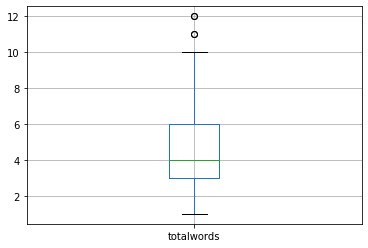

In [180]:
# Boxplot of the Totalwords column 
df_fin.boxplot(column ="totalwords" )

In [181]:
# - Calculate the number of unique words in the dataset
# getting the data reday to apply the count. 
unique = set(df[0].str.replace('[^a-zA-Z ]', '').str.lower().str.split(' ').sum())


from collections import Counter
df = pd.DataFrame(data)
unique = Counter()
df[0].str.lower().str.split().apply(unique.update)


# convert the count item into a dataframe
df_counted = pd.DataFrame.from_dict(unique, orient = "index").reset_index()
df_counted


/tmp/ipykernel_638/1583998216.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  unique = set(df[0].str.replace('[^a-zA-Z ]', '').str.lower().str.split(' ').sum())


,index,0
0,one,45
1,of,177
2,the,290
3,best,44
4,crichton,2
...,...,...
2554,doublespeak,1
2555,visit,1
2556,okay,1
2557,reefer,1


In [182]:
# Do not modify - Tokenize the vocabulary 
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=25)

tokenizer.fit_on_texts(data) #create the vocabularry

tokenized_data = tokenizer.texts_to_sequences(data) #tokenize the data using the vocabulary

vocab_size = len(tokenizer.word_index) + 1 

# Compare a sample of the data before and after tokenization
print(data[0:5])
print(tokenized_data[0:5])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book']
[[18, 4, 2, 19], [2, 4, 2], [], [6, 4], [1, 12, 3]]


# Pre-processing

In [183]:
# Pre-processing
# Write some code to pre-process the data so that each review is the same length

data4 = pad_sequences(tokenized_data, padding = "post" , maxlen = 4)
print(data4)


[[18  4  2 19]
 [ 2  4  2  0]
 [ 0  0  0  0]
 ...
 [ 0  0  0  0]
 [ 6  0  0  0]
 [ 0  0  0  0]]


In [184]:
# Write some code to split the data into a training and test set. Make sure you shuffle the data. Use 20% for the test set.

X = data4
y= labels

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, shuffle = True)

print(X_train.shape)



(1434, 4)


In [185]:
def assess_model(model, X_test, y_test):  
    
    # confution matrix 
    y_test_arg=np.argmax(y_test,axis=1)
    Y_pred = np.argmax(model.predict(X_test),axis=1)
    print('Confusion Matrix')
    print(confusion_matrix(y_test_arg, Y_pred))

    # clasification report 
    print("       ")
    print("classification_report")
    print(classification_report(to_class(y_test),Y_pred))

# Build and tune model

Define network architecture

In [186]:
inputdim = (np.max(X_train)+1)
outputdim = 8
inputlength = 4
ep = 4
bs = 10

In [187]:
model = Sequential()
model.add(tf.keras.layers.Embedding(inputdim, outputdim, input_length = 4))
model.add(BatchNormalization())
model.add(SpatialDropout1D(0.2))
model.add(BatchNormalization())
model.add(Dense(2,activation="relu"))
model.add(LSTM(32)) 
model.add(Dense(2 ,activation='softmax'))
model.add(Dense(2,activation="sigmoid"))


In [188]:
model.compile(
                        loss=keras.losses.BinaryCrossentropy(from_logits=True),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])


Train model

Model 1

In [189]:
# outputdim of 10
inputdim = (np.max(X_train)+1)
outputdim = 10
inputlength = 4
ep = 5
bs = 10


X_train = tf.expand_dims(X_train, axis=-1)

model = Sequential()
model.add(tf.keras.layers.Embedding(inputdim, outputdim, input_length = 4))
model.add(BatchNormalization())
model.add(SpatialDropout1D(0.2))
model.add(BatchNormalization())
model.add(Dense(2,activation="relu"))
model.add(LSTM(32)) 
model.add(Dense(2 ,activation='softmax'))
model.add(Dense(2,activation="sigmoid"))

model.compile(
                        loss=keras.losses.BinaryCrossentropy(from_logits=True),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])

In [190]:
history1 = model.fit(X_train, y_train, batch_size=bs, epochs=ep, validation_split=0.33 )

Epoch 1/5


/home/seanna/.local/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


96/96 [==============================] - 6s 20ms/step - loss: 0.7072 - accuracy: 0.5042 - val_loss: 0.6940 - val_accuracy: 0.5359
Epoch 2/5
96/96 [==============================] - 1s 9ms/step - loss: 0.6935 - accuracy: 0.5042 - val_loss: 0.6904 - val_accuracy: 0.5359
Epoch 3/5
96/96 [==============================] - 1s 9ms/step - loss: 0.6906 - accuracy: 0.5146 - val_loss: 0.6875 - val_accuracy: 0.5359
Epoch 4/5
96/96 [==============================] - 1s 8ms/step - loss: 0.6898 - accuracy: 0.5406 - val_loss: 0.6852 - val_accuracy: 0.5401
Epoch 5/5
96/96 [==============================] - 1s 8ms/step - loss: 0.6879 - accuracy: 0.5719 - val_loss: 0.6803 - val_accuracy: 0.5591


In [191]:
# save  model 1
model.save('M1')

INFO:tensorflow:Assets written to: M1/assets


INFO:tensorflow:Assets written to: M1/assets


In [192]:
m = keras.models.load_model('M1')
s = m.evaluate(X_test, y_test)
print("score")
print(s[1])

/home/seanna/.local/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 1s 3ms/step - loss: 0.6855 - accuracy: 0.5404
score
0.5403899550437927


Model 2

In [193]:
# outputdim of 25
inputdim = (np.max(X_train)+1)
outputdim = 25
inputlength = 4
ep = 5
bs = 10

model = Sequential()
model.add(tf.keras.layers.Embedding(inputdim, outputdim, input_length = 4))
model.add(BatchNormalization())
model.add(SpatialDropout1D(0.2))
model.add(BatchNormalization())
model.add(Dense(2,activation="relu"))
model.add(LSTM(32)) 
model.add(Dense(2 ,activation='softmax'))
model.add(Dense(2,activation="sigmoid"))


model.compile(
                        loss=keras.losses.BinaryCrossentropy(from_logits=True),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])

In [194]:
history2 = model.fit(X_train, y_train, batch_size=bs, epochs=ep,validation_split=0.33 )

Epoch 1/5
96/96 [==============================] - 6s 19ms/step - loss: 0.7227 - accuracy: 0.4958 - val_loss: 0.7230 - val_accuracy: 0.4641
Epoch 2/5
96/96 [==============================] - 1s 9ms/step - loss: 0.7078 - accuracy: 0.5000 - val_loss: 0.7107 - val_accuracy: 0.4641
Epoch 3/5
96/96 [==============================] - 1s 8ms/step - loss: 0.6982 - accuracy: 0.5365 - val_loss: 0.7009 - val_accuracy: 0.4641
Epoch 4/5
96/96 [==============================] - 1s 8ms/step - loss: 0.6915 - accuracy: 0.5510 - val_loss: 0.6942 - val_accuracy: 0.5759
Epoch 5/5
96/96 [==============================] - 1s 9ms/step - loss: 0.6880 - accuracy: 0.5604 - val_loss: 0.6892 - val_accuracy: 0.5591


In [195]:
# save  model 2
model.save('M2')

INFO:tensorflow:Assets written to: M2/assets


INFO:tensorflow:Assets written to: M2/assets


In [196]:
# evaluate model 2
from keras import losses 
from keras import optimizers 
from keras import metrics 

m = keras.models.load_model('M2')
s = m.evaluate(X_test, y_test)
print("score")
print(s[1])

/home/seanna/.local/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 1s 4ms/step - loss: 0.6886 - accuracy: 0.5627
score
0.5626741051673889


Model 3

In [197]:
# outputdim of 50
inputdim = (np.max(X_train)+1)
outputdim = 50
inputlength = 4
ep = 5
bs = 10

model = Sequential()
model.add(tf.keras.layers.Embedding(inputdim, outputdim, input_length = 4))
model.add(BatchNormalization())
model.add(SpatialDropout1D(0.2))
model.add(BatchNormalization())
model.add(Dense(2,activation="relu"))
model.add(LSTM(32)) 
model.add(Dense(2 ,activation='softmax'))
model.add(Dense(2,activation="sigmoid"))

model.compile(
                        loss=keras.losses.BinaryCrossentropy(from_logits=True),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])

In [198]:
history3 = model.fit(X_train, y_train, batch_size=bs, epochs=ep,validation_split=0.33 )

Epoch 1/5
96/96 [==============================] - 5s 19ms/step - loss: 0.7139 - accuracy: 0.4958 - val_loss: 0.7132 - val_accuracy: 0.4641
Epoch 2/5
96/96 [==============================] - 1s 9ms/step - loss: 0.7059 - accuracy: 0.4958 - val_loss: 0.7062 - val_accuracy: 0.4641
Epoch 3/5
96/96 [==============================] - 1s 9ms/step - loss: 0.7007 - accuracy: 0.4958 - val_loss: 0.7012 - val_accuracy: 0.4641
Epoch 4/5
96/96 [==============================] - 1s 9ms/step - loss: 0.6959 - accuracy: 0.5052 - val_loss: 0.6948 - val_accuracy: 0.4768
Epoch 5/5
96/96 [==============================] - 1s 9ms/step - loss: 0.6916 - accuracy: 0.5604 - val_loss: 0.6892 - val_accuracy: 0.5232


In [199]:
# save  model 3
model.save('M3')

INFO:tensorflow:Assets written to: M3/assets


INFO:tensorflow:Assets written to: M3/assets


In [200]:
# evaluate model 3
m = keras.models.load_model('M3')
s = m.evaluate(X_test, y_test)
print("score")
print(s[1])

/home/seanna/.local/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 1s 5ms/step - loss: 0.6907 - accuracy: 0.5209
score
0.5208913683891296


Model 4

In [201]:
# outputdim of 100
inputdim = (np.max(X_train)+1)
outputdim = 100
inputlength = 4
ep = 5
bs = 10

model = Sequential()
model.add(tf.keras.layers.Embedding(inputdim, outputdim, input_length = 4))
model.add(BatchNormalization())
model.add(SpatialDropout1D(0.2))
model.add(BatchNormalization())
model.add(Dense(2,activation="relu"))
model.add(LSTM(32)) 
model.add(Dense(2 ,activation='softmax'))
model.add(Dense(2,activation="sigmoid"))

model.compile(
                        loss=keras.losses.BinaryCrossentropy(from_logits=True),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])

In [202]:
history4 = model.fit(X_train, y_train, batch_size=bs, epochs=ep,validation_split=0.33 )

Epoch 1/5
96/96 [==============================] - 7s 32ms/step - loss: 0.6935 - accuracy: 0.4708 - val_loss: 0.6925 - val_accuracy: 0.5359
Epoch 2/5
96/96 [==============================] - 1s 9ms/step - loss: 0.6833 - accuracy: 0.5417 - val_loss: 0.6909 - val_accuracy: 0.5127
Epoch 3/5
96/96 [==============================] - 1s 10ms/step - loss: 0.6714 - accuracy: 0.5885 - val_loss: 0.6774 - val_accuracy: 0.6118
Epoch 4/5
96/96 [==============================] - 1s 10ms/step - loss: 0.6660 - accuracy: 0.5948 - val_loss: 0.6699 - val_accuracy: 0.6203
Epoch 5/5
96/96 [==============================] - 1s 9ms/step - loss: 0.6649 - accuracy: 0.5969 - val_loss: 0.6579 - val_accuracy: 0.6414


In [203]:
# save  model 4
model.save('M4')

INFO:tensorflow:Assets written to: M4/assets


INFO:tensorflow:Assets written to: M4/assets


In [204]:
# evaluate model 4
m = keras.models.load_model('M4')
s = m.evaluate(X_test, y_test)
print("score")
print(s[1])

/home/seanna/.local/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 1s 4ms/step - loss: 0.6679 - accuracy: 0.5989
score
0.5988857746124268


From the above we can see that model 3 has the best score. 

# Examine performance of model

Picking the final model based on score : model 3 has the highest score 

In [205]:
#based on the score and final evaluation the best model to use is model3
model = keras.models.load_model('M3')

In [206]:
metric_values = model.evaluate(x= X_test, y= y_test)
print('Final TEST performance')
for metric_value, metric_name in zip(metric_values, model.metrics_names):
  print('{}: {}'.format(metric_name, metric_value))

12/12 [==============================] - 1s 5ms/step - loss: 0.6907 - accuracy: 0.5209
Final TEST performance
loss: 0.6907346248626709
accuracy: 0.5208913683891296


In [207]:
assess_model(model, X_test, y_test)   

Confusion Matrix
[[165  11]
 [161  22]]
       
classification_report
              precision    recall  f1-score   support

           0       0.51      0.94      0.66       176
           1       0.67      0.12      0.20       183

    accuracy                           0.52       359
   macro avg       0.59      0.53      0.43       359
weighted avg       0.59      0.52      0.43       359



Plot graphs for accuracy and loss

In [208]:
#getting the Keys of histoy to see what to graph
print(history3.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


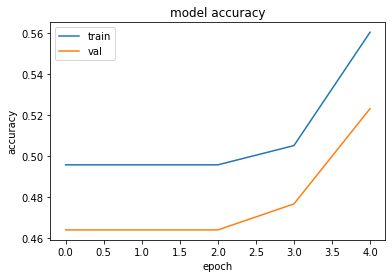

In [209]:
# Plot of the Accuracy of the model
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

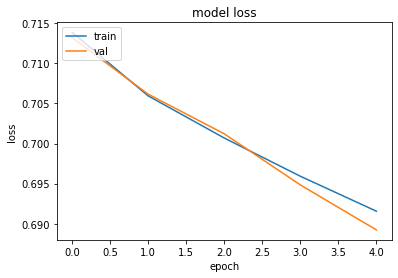

In [210]:
# Plot of the Accuracy of the model
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# this code was adatped form https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy

# Make a prediction

In [211]:
model = keras.models.load_model('M3')

In [222]:
# set of complieed data to check prediction
prediction_data = ["this book is fabulous","i hated this book", "the best", "no good", "okay"]
tokenized = tokenizer.texts_to_sequences(prediction_data)
padded = pad_sequences(tokenized, padding='post', maxlen=4)

# Supply this data to each of your models and see how it does. 
# You can call the helper function "to_word_label" to map the output of the model to the name of the
# class it was predicted to belong to

data_test = to_word_label(padded)
print(data_test)

data_1 = []
for i in range(0,5):
    d = data_test[i]
    if d == 'positive':
        data_1.append(0)
    else:
        data_1.append(1)
print(data_1)
predictions = model.predict(padded)

pred = to_word_label(predictions)

#pred = model.predict(data_1)

for i in range(0,5):
    print(i)
    print("predition")
    print(pred[i])
    print("test data")
    print(data_1[i])
    print("       ")

['negative', 'positive', 'negative', 'positive', 'positive']
[1, 0, 1, 0, 0]
0
predition
positive
test data
1
       
1
predition
negative
test data
0
       
2
predition
positive
test data
1
       
3
predition
positive
test data
0
       
4
predition
positive
test data
0
       
